<a href="https://colab.research.google.com/github/asafuM-56/Week-2-Worksheet/blob/main/WEEK_2_WORKSHEET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Biomass Gassification Data

In [ ]:
import pandas as pd

# Replace 'your_file_path.xlsx' with the actual path to your Excel file
file_path = '/content/Biomass Gasification Dataset.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

print(df.head())  # Print the first few rows of the DataFrame

          feed Type of Feed      C     H     N    S      O  ASH  \
0  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
1  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
2  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
3  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
4  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   

   C-H Aromatics   C-H  Alkanes  ...  Time    BC  Reactor  Catalyst Type  \
0               1             1  ...    30   5.0    Batch              0   
1               1             1  ...    60   5.0    Batch              0   
2               1             1  ...    30  15.0    Batch              0   
3               1             1  ...    60  15.0    Batch              0   
4               1             1  ...    45  10.0    Batch              0   

   Catalyst Concentration  CO2 mole fraction  H2 mole fraction  \
0                     0.0              92.37              1.54   
1       

In [ ]:
# Get the number of rows and columns
num_rows, num_cols = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 244
Number of columns: 25


In [ ]:
# Get the data types of each column
data_types = df.dtypes

# Print the data types
print(data_types)

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nNumeric columns:", numeric_cols)
print("\nCategorical columns:", categorical_cols)

feed                       object
Type of Feed               object
C                         float64
H                         float64
N                         float64
S                         float64
O                         float64
ASH                       float64
C-H Aromatics               int64
C-H  Alkanes                int64
C-O                         int64
C=C                         int64
C=O                         int64
O-H                         int64
Temp                        int64
Time                        int64
BC                        float64
Reactor                    object
Catalyst Type              object
Catalyst Concentration    float64
CO2 mole fraction         float64
H2 mole fraction          float64
Hydrogen selectivity      float64
CO mole fraction          float64
CH4 mole fraction         float64
dtype: object

Numeric columns: Index(['C', 'H', 'N', 'S', 'O', 'ASH', 'C-H Aromatics ', 'C-H  Alkanes',
       'C-O ', 'C=C ', 'C=O ', 'O-H ', 'Temp'

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Remove rows with missing values in categorical columns
df = df.dropna(subset=categorical_cols)

# Replace missing values in numeric columns with the mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Verify that missing values have been removed
missing_values_after_cleaning = df.isnull().sum()
print("\nMissing values after cleaning:\n", missing_values_after_cleaning)

Missing values:
 feed                      0
Type of Feed              0
C                         0
H                         0
N                         0
S                         0
O                         0
ASH                       0
C-H Aromatics             0
C-H  Alkanes              0
C-O                       0
C=C                       0
C=O                       0
O-H                       0
Temp                      0
Time                      0
BC                        0
Reactor                   0
Catalyst Type             0
Catalyst Concentration    0
CO2 mole fraction         0
H2 mole fraction          0
Hydrogen selectivity      0
CO mole fraction          0
CH4 mole fraction         0
dtype: int64

Missing values after cleaning:
 feed                      0
Type of Feed              0
C                         0
H                         0
N                         0
S                         0
O                         0
ASH                       0
C-H Aromatics

The column that represents the feed is in column A. The column that represents the type is column B

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by "Type of Feed"
grouped_data = df.groupby("Type of Feed")

# Calculate summary statistics
summary_stats = grouped_data[['C', 'H', 'N', 'S', 'O', 'ASH']].describe()

# Print the summary statistics
print(summary_stats)

                                       C                                     \
                                   count   mean           std    min    25%   
Type of Feed                                                                  
Banana Peel                          1.0  41.34           NaN  41.34  41.34   
Black Liqour- Wood 5%                1.0  35.58           NaN  35.58  35.58   
Black Liquor                        17.0  35.58  0.000000e+00  35.58  35.58   
Black Liquor- Wood 3%                1.0  35.58           NaN  35.58  35.58   
Black Liquor- Wood 3%- Formic Acid   1.0  35.58           NaN  35.58  35.58   
Black Liquor- Wood 5%- Formic Acid   1.0  35.58           NaN  35.58  35.58   
Black Liquor- Wood 7%                1.0  35.58           NaN  35.58  35.58   
Black Liquor- Wood 7%- Formic Acid   1.0  35.58           NaN  35.58  35.58   
Chulorala Valgaris- CGLY 4%          6.0  52.20  7.783606e-15  52.20  52.20   
Chulorala Valgaris-Dionized Water    1.0  52.20     

In [ ]:
column_name = 'Temp'

# Calculate maximum, minimum, and average
maximum_value = df[column_name].max()
minimum_value = df[column_name].min()
average_value = df[column_name].mean()

# Print the results
print("Maximum value:", maximum_value)
print("Minimum value:", minimum_value)
print("Average value:", average_value)

Maximum value: 400
Minimum value: 80
Average value: 369.36475409836066


The only redundant column is reactor type, since nothing between it changes

In [ ]:
# Drop the "Reactor" column
df = df.drop(columns=['Reactor'])

# Print the resulting DataFrame
print(df.head())

          feed Type of Feed      C     H     N    S      O  ASH  \
0  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
1  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
2  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
3  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
4  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   

   C-H Aromatics   C-H  Alkanes  ...  Temp  Time    BC  Catalyst Type  \
0               1             1  ...   350    30   5.0              0   
1               1             1  ...   350    60   5.0              0   
2               1             1  ...   350    30  15.0              0   
3               1             1  ...   350    60  15.0              0   
4               1             1  ...   350    45  10.0              0   

   Catalyst Concentration  CO2 mole fraction  H2 mole fraction  \
0                     0.0              92.37              1.54   
1                     0.0 

In [ ]:
# Create new columns for the ratios
df['C-to-H'] = df['C'] / df['H']
df['O-to-H'] = df['O'] / df['H']
print(df.head())

# Calculate the ranges for the ratios
c_to_h_range = (df['C-to-H'].min(), df['C-to-H'].max())
o_to_h_range = (df['O-to-H'].min(), df['O-to-H'].max())

# Print the ranges
print("C-to-H range:", c_to_h_range)
print("O-to-H range:", o_to_h_range)

          feed Type of Feed      C     H     N    S      O  ASH  \
0  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
1  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
2  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
3  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
4  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   

   C-H Aromatics   C-H  Alkanes  ...    BC  Catalyst Type  \
0               1             1  ...   5.0              0   
1               1             1  ...   5.0              0   
2               1             1  ...  15.0              0   
3               1             1  ...  15.0              0   
4               1             1  ...  10.0              0   

   Catalyst Concentration  CO2 mole fraction  H2 mole fraction  \
0                     0.0              92.37              1.54   
1                     0.0              93.00              2.49   
2                     0.0       

One-hot encoding for type of feed

In [ ]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Type of Feed'])

# Print the encoded DataFrame
print(df_encoded.head())

          feed      C     H     N    S      O  ASH  C-H Aromatics   \
0  Fruit Waste  41.71  6.04  1.91  0.0  50.34  0.0               1   
1  Fruit Waste  41.71  6.04  1.91  0.0  50.34  0.0               1   
2  Fruit Waste  41.71  6.04  1.91  0.0  50.34  0.0               1   
3  Fruit Waste  41.71  6.04  1.91  0.0  50.34  0.0               1   
4  Fruit Waste  41.71  6.04  1.91  0.0  50.34  0.0               1   

   C-H  Alkanes  C-O   ...  Type of Feed_Dunalila salina- CGLY 4%  \
0             1     1  ...                                  False   
1             1     1  ...                                  False   
2             1     1  ...                                  False   
3             1     1  ...                                  False   
4             1     1  ...                                  False   

   Type of Feed_Dunalila salina- Dionized Water  \
0                                         False   
1                                         False   
2          

23 columns were added to the spreadsheet

In [ ]:
#Looking for outliers

import numpy as np
import pandas as pd

# Define columns of interest
columns_of_interest = ['CO2 mole fraction', 'CO mole fraction', 'H2 mole fraction', 'CH4 mole fraction', 'Hydrogen selectivity']

# Calculate the interquartile range (IQR) for each column
Q1 = df[columns_of_interest].quantile(0.25)
Q3 = df[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier threshold
outlier_threshold = 2 * IQR

# Identify outliers
outliers = (df[columns_of_interest] < (Q1 - outlier_threshold)) | (df[columns_of_interest] > (Q3 + outlier_threshold))

# Check if outliers exist
if outliers.any().any():
    print("Outliers detected in the following columns:")
    print(outliers.sum())
else:
    print("No outliers detected.")

Outliers detected in the following columns:
CO2 mole fraction        0
CO mole fraction        11
H2 mole fraction         0
CH4 mole fraction        0
Hydrogen selectivity     6
dtype: int64


It is worth considering removing the rows with outliers beyond a certain range. I will probably delete the rows with those outliers to exclude them from the final processing of data


In [ ]:
# Define the columns to check for outliers
columns_to_check = ['CO2 mole fraction', 'H2 mole fraction', 'Hydrogen selectivity', 'CO mole fraction', 'CH4 mole fraction']

# Function to detect outliers using IQR
def remove_outliers_iqr(df, columns):
    q1 = df[columns].quantile(0.25)
    q3 = df[columns].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 2 * iqr
    upper_bound = q3 + 2 * iqr
    outliers = (df[columns] < lower_bound) | (df[columns] > upper_bound)
    return df[~outliers]

# Remove outliers and store the result in a new DataFrame
df_cleaned = remove_outliers_iqr(df, columns_to_check)

# Save the cleaned DataFrame to a new Excel file
df_cleaned.to_excel('cleaned_data.xlsx', index=False)

We will now move on to the exploratory data analysis

Plotting a histogram for temp

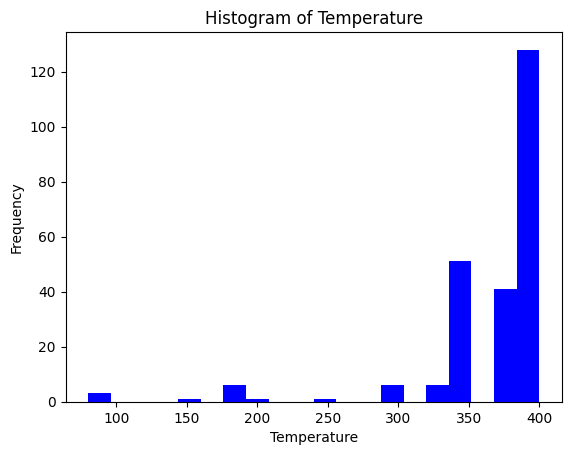

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.hist(df['Temp'], bins=20, color='blue')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.show()

Based on this ditribution most of the biofuels require a high temperature for the reaction to occur

Correlation between CO2 mole fraction and Temp

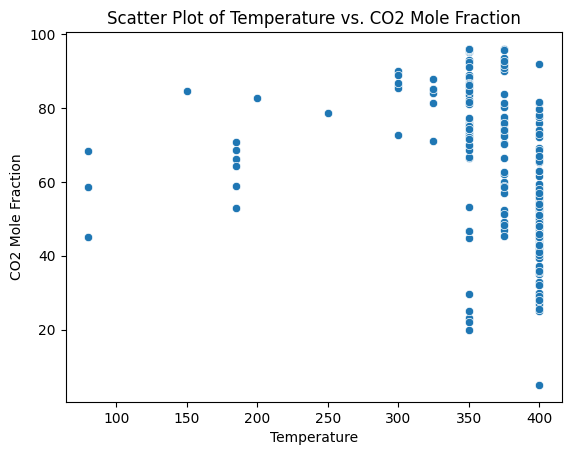

Correlation coefficient: -0.3139426047465725


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
sns.scatterplot(x='Temp', y='CO2 mole fraction', data=df)
plt.title('Scatter Plot of Temperature vs. CO2 Mole Fraction')
plt.xlabel('Temperature')
plt.ylabel('CO2 Mole Fraction')
plt.show()

# Calculate the correlation coefficient
correlation = df['Temp'].corr(df['CO2 mole fraction'])
print(f"Correlation coefficient: {correlation}")

There is not a strong correlation between CO2 and Temp

Visualize the relationship between carbon content in the feed and hydrogen selectivity

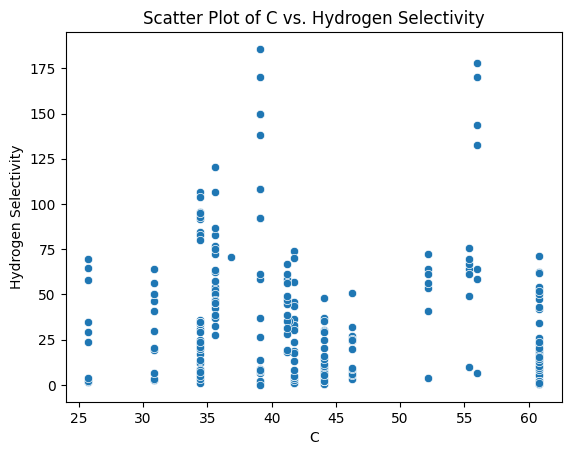

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
sns.scatterplot(x='C', y='Hydrogen selectivity', data=df)
plt.title('Scatter Plot of C vs. Hydrogen Selectivity')
plt.xlabel('C')
plt.ylabel('Hydrogen Selectivity')
plt.show()

Hydrogen selectivity sometimes spikes around a carbon content of 40% and 55%, but other than that there seems to be no correlation.

CO mole fraction vs H2 mole fraction

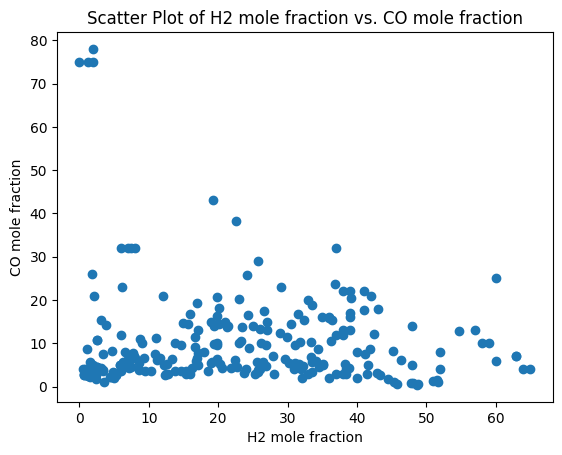

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.scatter(df['H2 mole fraction'], df['CO mole fraction'])
plt.xlabel('H2 mole fraction')
plt.ylabel('CO mole fraction')
plt.title('Scatter Plot of H2 mole fraction vs. CO mole fraction')
plt.show()

Only very high CO levels correspond to low H2 levels, otherwise the correlation isn't strong

Splitting the dataset

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
X = df.drop(['CO2 mole fraction', 'H2 mole fraction', 'Hydrogen selectivity', 'CO mole fraction', 'CH4 mole fraction'], axis=1)
y = df[['CO2 mole fraction', 'H2 mole fraction', 'Hydrogen selectivity', 'CO mole fraction', 'CH4 mole fraction']]

print(X.head())
print(y.head())

          feed Type of Feed      C     H     N    S      O  ASH  \
0  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
1  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
2  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
3  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
4  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   

   C-H Aromatics   C-H  Alkanes  ...  C=C   C=O   O-H   Temp  Time    BC  \
0               1             1  ...     1     1     1   350    30   5.0   
1               1             1  ...     1     1     1   350    60   5.0   
2               1             1  ...     1     1     1   350    30  15.0   
3               1             1  ...     1     1     1   350    60  15.0   
4               1             1  ...     1     1     1   350    45  10.0   

   Catalyst Type Catalyst Concentration    C-to-H    O-to-H  
0              0                    0.0  6.905629  8.334437  
1              0